In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
from IPython.display import Image
import os
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from math import sqrt
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import pipeline, preprocessing, neighbors, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

In [3]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')
# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob'])]
# Drop rows with NANs
df_pluto = df_pluto.dropna()

## Test train split

In [ ]:
from sklearn.preprocessing import StandardScaler


df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')

y_axis = 'ZoneCodeWasVacant'

# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','ZoneCodeBecameCondo'])]
df_pluto = df_pluto.dropna()


# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)

scalar = StandardScaler()
xtrains = scalar.fit(xtrain)
xtrains = scalar.transform(xtrain)
xtrains = pd.DataFrame(xtrains)

xtests = scalar.transform(xtest)
xtests = pd.DataFrame(xtests)

log = get_logistic_regression_results(xtrains,ytrain)
test_score = log.score(xtests,ytest)
train_score = log.score(xtrains,ytrain)

print(f'Current Y Axis: {y_axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtests)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtests,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

In [24]:
from sklearn.preprocessing import StandardScaler


df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2015-2017.pkl')

y_axis = 'ZoneCodeWasVacant'

# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','ZoneCodeBecameCondo'])]
df_pluto = df_pluto.dropna()


# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)


log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {y_axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

# 2016 ZONE CODE BECAME CONDO

In [11]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')

y_axis = 'ZoneCodeBecameCondo'

# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','ZoneCodeWasVacant'])]
df_pluto = df_pluto.dropna()



# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)

log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

NameError: name 'axis' is not defined

# 2016 ZONE CODE CHANGED

Current Y Axis: ZoneCodeWasVacant
--LOGISTIC--

test: 0.8532042821528083 train: 0.8506404615234184
              precision    recall  f1-score   support

Became Other       1.00      0.85      0.92      6777
Became Condo       0.03      0.71      0.06        42

 avg / total       0.99      0.85      0.92      6819


--RANDOM FOREST--

rf score: 0.9925690540210219

              Features  Important
235          YearBuilt     67.417
174            LandUse     39.458
177   LandUse2016_11.0     37.958
1            AssessTot     30.783
0           AssessLand     29.937
7             BuiltFAR     29.457
5                Block     26.953
232             YCoord     26.691
190           LotFront     25.462
233         YearAlter1     25.318
..                 ...        ...
156  HealthArea_8521.0      0.000
145  HealthArea_7910.0      0.000
107  HealthArea_5310.0      0.000
134  HealthArea_7220.0      0.000
128  HealthArea_6900.0      0.000
121  HealthArea_6300.0      0.000
118  HealthArea_6000

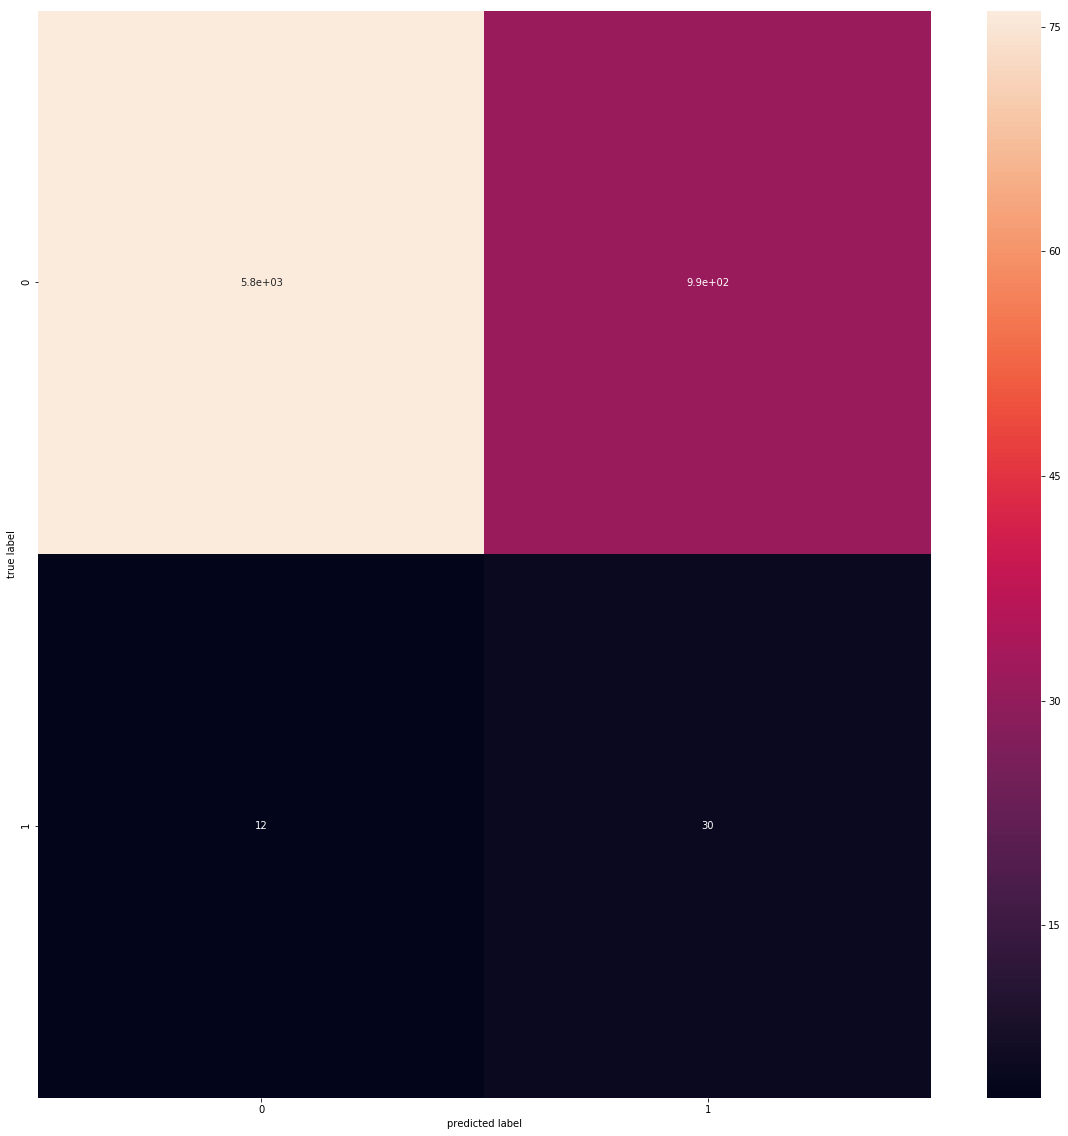

In [40]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')

y_axis = 'ZoneCodeChanged'
year = "2016"

# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeBecameCondo','ZoneCodeWasVacant'])]
df_pluto = df_pluto.dropna()

# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)

log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {y_axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

# 2016 ZONE CODE WAS VACANT 

Current Y Axis: ZoneCodeWasVacant
--LOGISTIC--

test: 0.8791611673265874 train: 0.8754766793781168
              precision    recall  f1-score   support

Became Other       1.00      0.88      0.94      6812
Became Condo       0.00      0.57      0.01         7

 avg / total       1.00      0.88      0.93      6819


--RANDOM FOREST--

rf score: 0.998851136641408

              Features  Important
235          YearBuilt    161.609
177   LandUse2016_11.0     96.479
221            ResArea     53.043
230         UnitsTotal     36.919
7             BuiltFAR     33.914
229           UnitsRes     31.461
220           ProxCode     30.157
232             YCoord     26.709
1            AssessTot     26.154
2             BldgArea     25.265
..                 ...        ...
132  HealthArea_7120.0      0.000
133  HealthArea_7210.0      0.000
134  HealthArea_7220.0      0.000
135  HealthArea_7310.0      0.000
136  HealthArea_7320.0      0.000
139  HealthArea_7510.0      0.000
140  HealthArea_7520.

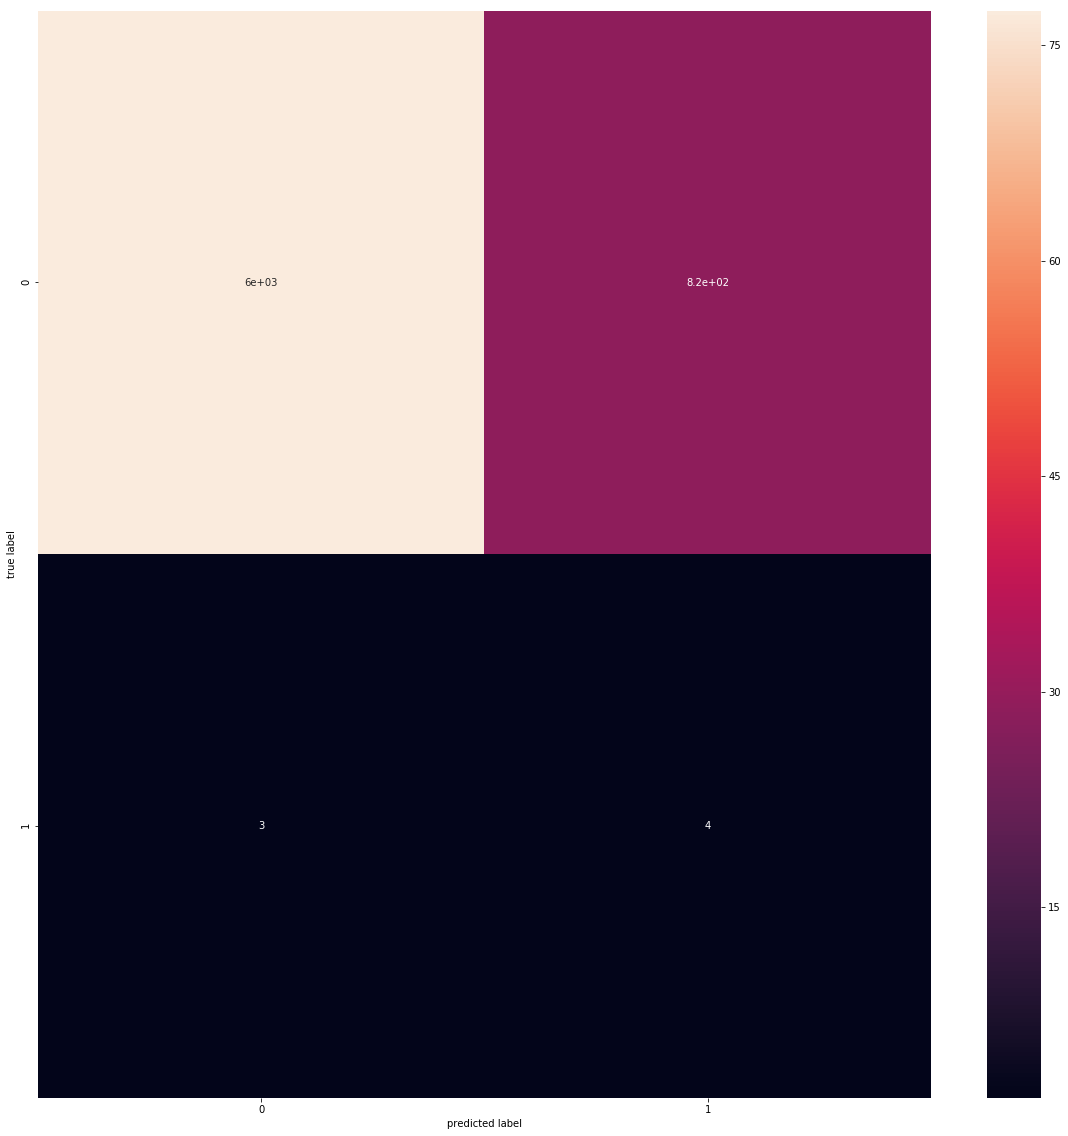

In [41]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')

y_axis = 'ZoneCodeWasVacant'
# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','ZoneCodeBecameCondo'])]
df_pluto = df_pluto.dropna()

# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)

log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

# 2013 ZONE CODE BECAME CONDO

Current Y Axis: ZoneCodeWasVacant
--LOGISTIC--

test: 0.8367406971613472 train: 0.8401569012012748
              precision    recall  f1-score   support

Became Other       1.00      0.84      0.91      6699
Became Condo       0.06      0.73      0.12       100

 avg / total       0.98      0.84      0.90      6799


--RANDOM FOREST--

rf score: 0.9922049270743963

              Features  Important
235          YearBuilt     64.571
174            LandUse     57.279
181    LandUse2016_5.0     37.914
221            ResArea     31.049
1            AssessTot     28.740
229           UnitsRes     28.236
233         YearAlter1     26.371
7             BuiltFAR     25.827
0           AssessLand     25.589
223         RetailArea     23.543
..                 ...        ...
121  HealthArea_6300.0      0.000
118  HealthArea_6000.0      0.000
106  HealthArea_5200.0      0.000
89   HealthArea_3810.0      0.000
74   HealthArea_2500.0      0.000
62   HealthArea_1420.0      0.000
29              CD_4

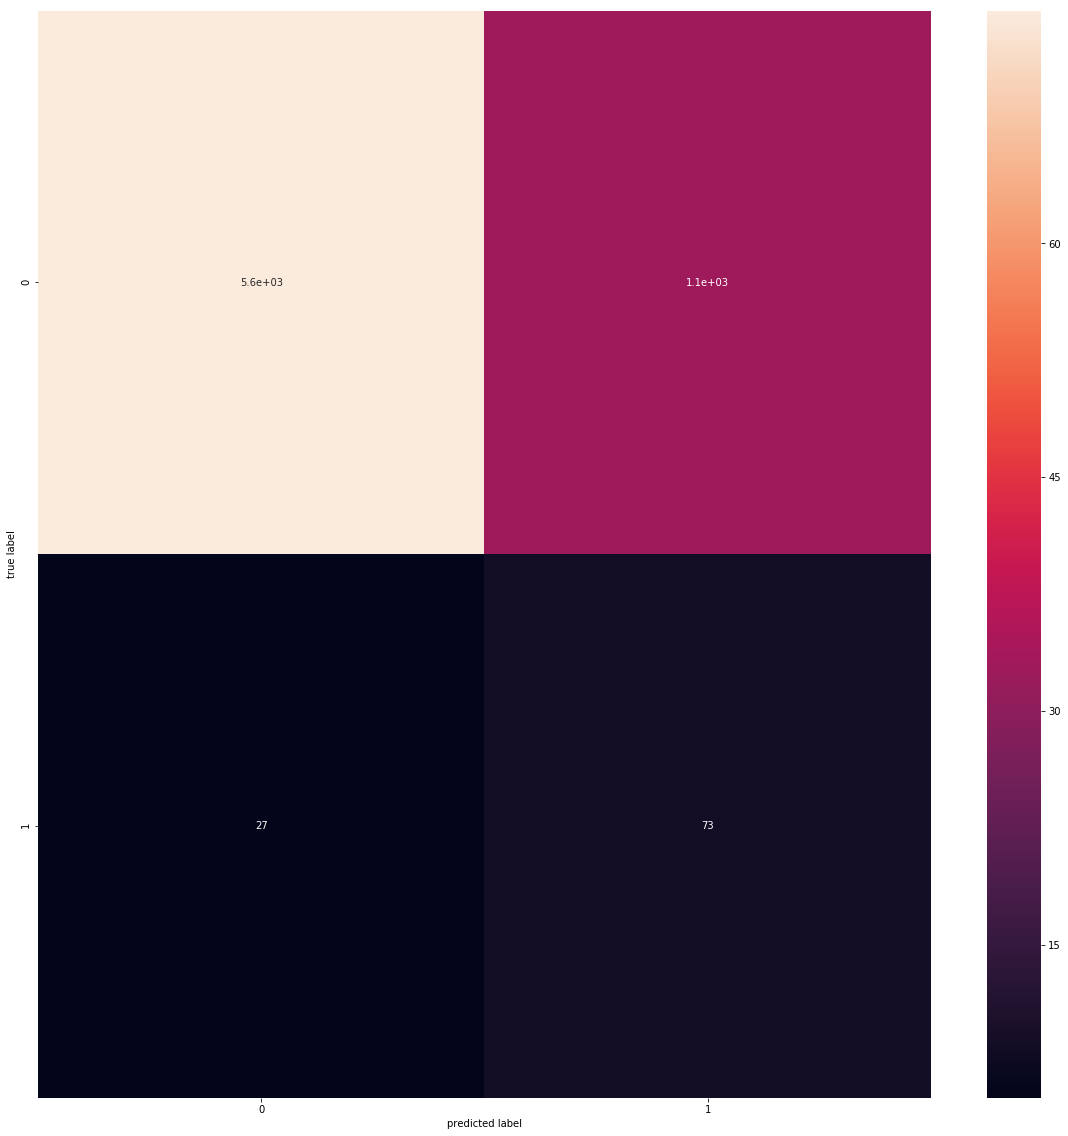

In [42]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')

y_axis = 'ZoneCodeBecameCondo'

# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','ZoneCodeWasVacant'])]
df_pluto = df_pluto.dropna()

# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]


# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)


log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

In [ ]:
# 2013 ZONE CODE CHANGED

Current Y Axis: ZoneCodeChanged
--LOGISTIC--

test: 0.8371819385203706 train: 0.8470213287570483
              precision    recall  f1-score   support

Became Other       0.99      0.84      0.91      6627
Became Condo       0.10      0.71      0.18       172

 avg / total       0.97      0.84      0.89      6799


--RANDOM FOREST--

rf score: 0.9859786738570904

              Features  Important
174            LandUse     68.811
235          YearBuilt     64.181
177   LandUse2016_11.0     33.700
233         YearAlter1     30.345
1            AssessTot     25.591
0           AssessLand     23.911
31             ComArea     23.714
221            ResArea     23.659
7             BuiltFAR     22.088
5                Block     21.574
..                 ...        ...
275    ZipCode_11251.0      0.000
27              CD_355      0.000
118  HealthArea_6000.0      0.000
28              CD_356      0.000
29              CD_410      0.000
62   HealthArea_1420.0      0.000
156  HealthArea_8521.0

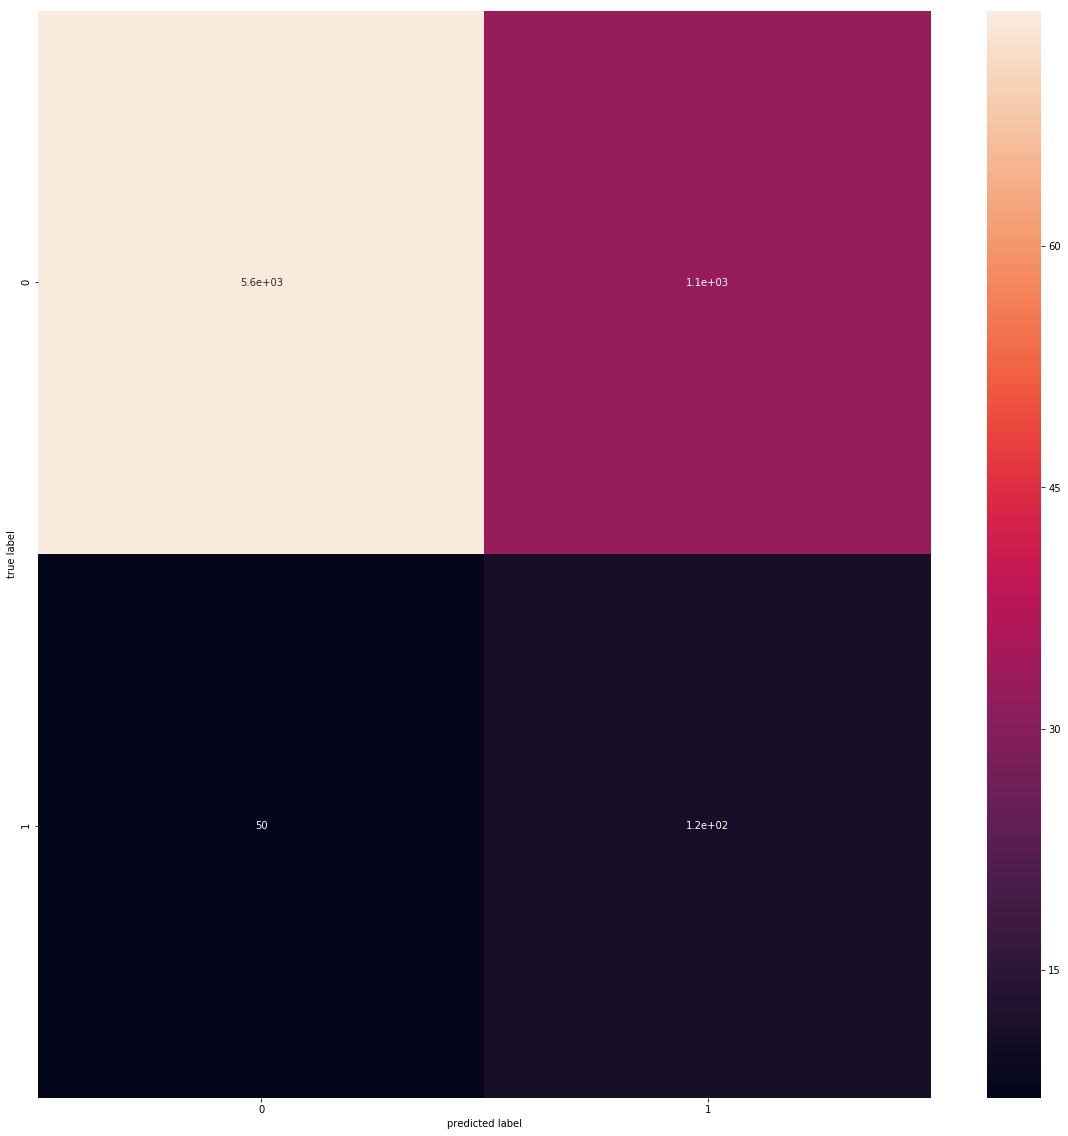

In [43]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')

y_axis = 'ZoneCodeChanged'
year = "2016"

# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeBecameCondo','ZoneCodeWasVacant'])]
df_pluto = df_pluto.dropna()

# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)

log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {y_axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

# 2013 ZONE CODE BECAME CONDO

Current Y Axis: ZoneCodeWasVacant
--LOGISTIC--

test: 0.8881067605220707 train: 0.8821746357680649
              precision    recall  f1-score   support

Became Other       1.00      0.89      0.94      6807
Became Condo       0.01      0.33      0.01        12

 avg / total       1.00      0.89      0.94      6819


--RANDOM FOREST--

rf score: 0.998851136641408

              Features  Important
235          YearBuilt    137.441
177   LandUse2016_11.0     98.750
3            BldgDepth     42.501
221            ResArea     38.767
230         UnitsTotal     38.454
229           UnitsRes     38.066
54    FloorCountBucket     37.732
1            AssessTot     32.749
7             BuiltFAR     29.862
194          NumFloors     27.577
..                 ...        ...
131  HealthArea_7110.0      0.000
132  HealthArea_7120.0      0.000
133  HealthArea_7210.0      0.000
134  HealthArea_7220.0      0.000
135  HealthArea_7310.0      0.000
136  HealthArea_7320.0      0.000
139  HealthArea_7510.

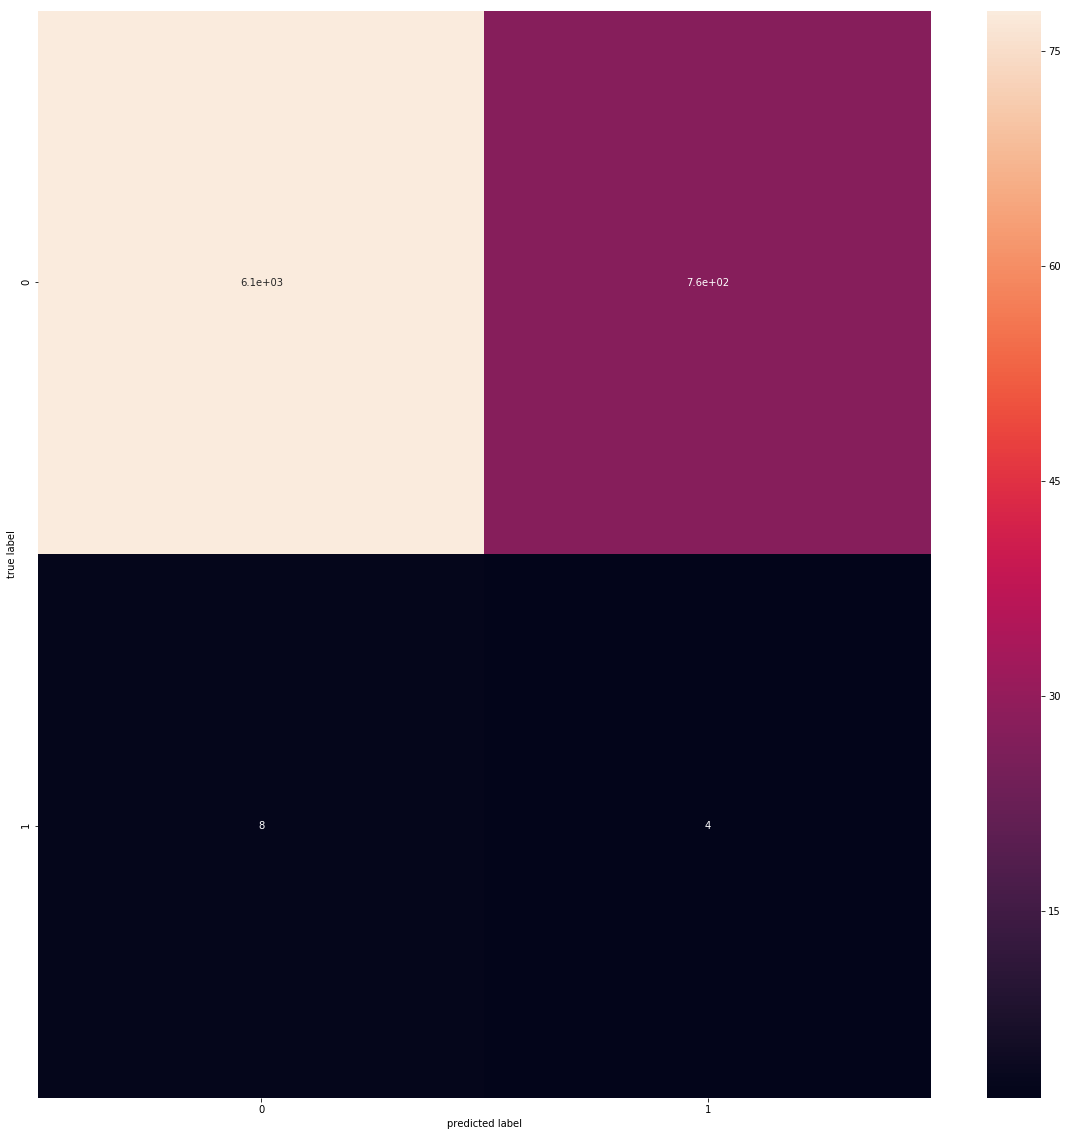

In [44]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')

y_axis = 'ZoneCodeWasVacant'
# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','ZoneCodeBecameCondo'])]
df_pluto = df_pluto.dropna()

# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)

log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

# LEGACY

Current Y Axis: ZoneCodeBecameCondo
--LOGISTIC--

test: 0.8466050740577797 train: 0.839542387797008
              precision    recall  f1-score   support

Became Other       1.00      0.85      0.92      6803
Became Condo       0.01      0.56      0.02        16

 avg / total       1.00      0.85      0.91      6819


--RANDOM FOREST--

rf score: 0.9965411879736006

              Features  Important
235          YearBuilt     75.721
177   LandUse2016_11.0     51.680
1            AssessTot     45.775
221            ResArea     42.819
2             BldgArea     30.139
233         YearAlter1     27.086
232             YCoord     25.363
188           LotCount     25.130
0           AssessLand     24.925
231             XCoord     24.339
..                 ...        ...
134  HealthArea_7220.0      0.000
125  HealthArea_6600.0      0.000
121  HealthArea_6300.0      0.000
120  HealthArea_6200.0      0.000
119  HealthArea_6100.0      0.000
118  HealthArea_6000.0      0.000
117   HealthArea_60

KeyError: 'ZoneCodeWasVacant'

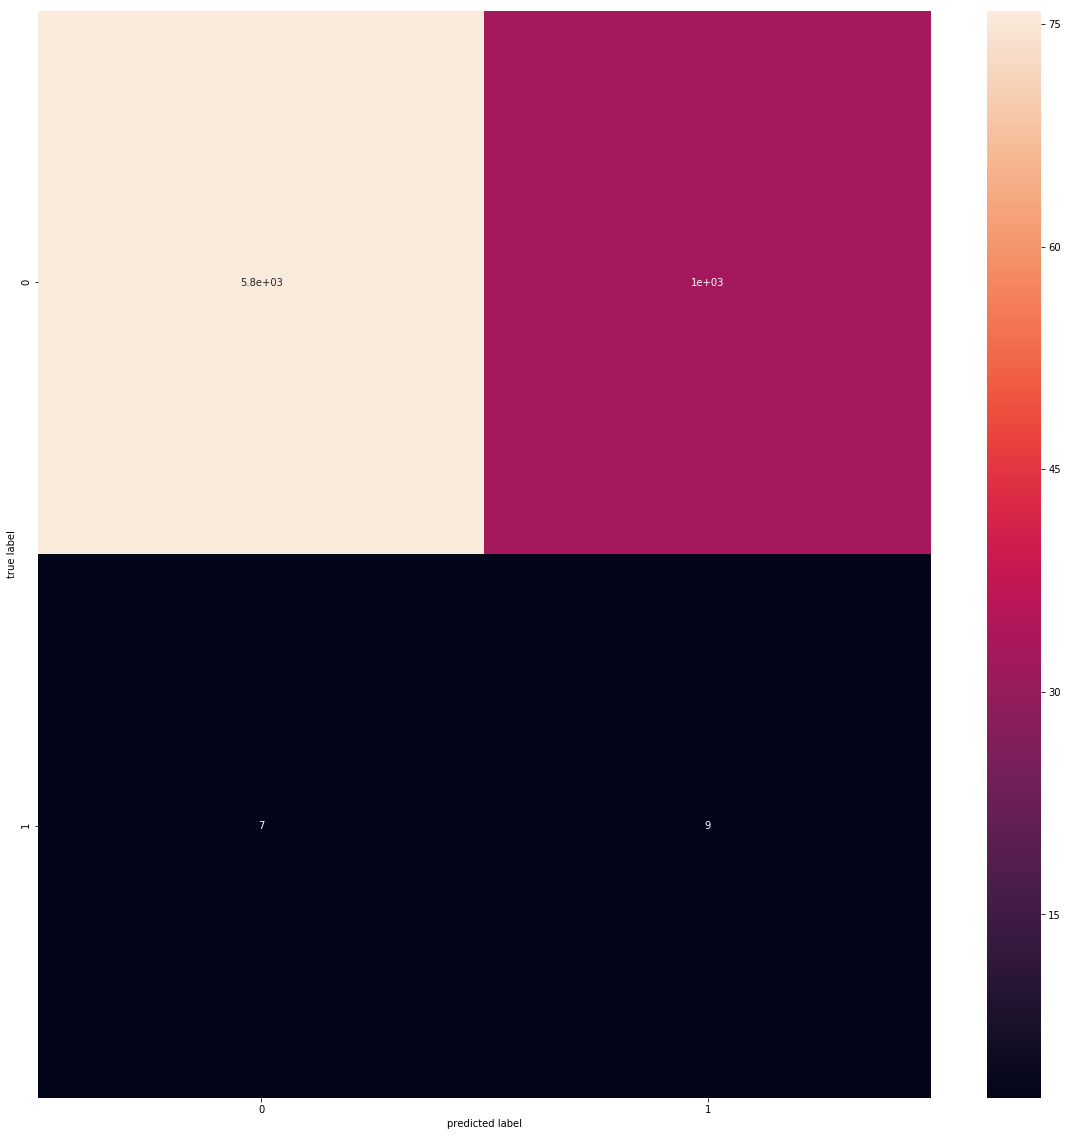

In [27]:
# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]
y_axis = ['ZoneCodeBecameCondo','ZoneCodeWasVacant','ZoneCodeChanged']

# Create independent/ dependent variables
y = df_pluto[axis].astype(int)
X = df_pluto[df_pluto.columns.difference([axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)

log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

In [22]:
log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)
print("\n--RANDOM FOREST--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))

plot_confusion(log,xtest,ytest)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [17]:
randomforest,rf_results = get_random_forest(X,y)
print(f'y: {rf_results}\n')
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)

rf score: 0.9987789987789988

              Features  Important
7             BuiltFAR     38.719
30              CT2010     38.712
2             BldgArea     35.323
177   LandUse2016_11.0     33.988
235          YearBuilt     32.736
233         YearAlter1     31.184
221            ResArea     30.749
186                Lot     30.634
188           LotCount     28.089
228          Tract2010     26.901
..                 ...        ...
118  HealthArea_6000.0      0.000
119  HealthArea_6100.0      0.000
120  HealthArea_6200.0      0.000
121  HealthArea_6300.0      0.000
122  HealthArea_6410.0      0.000
123  HealthArea_6420.0      0.000
124  HealthArea_6500.0      0.000
125  HealthArea_6600.0      0.000
128  HealthArea_6900.0      0.000
276    ZipCode_11416.0      0.000

[277 rows x 2 columns]


With subset

## Logistic Regression
`default=weighted`

In [5]:
def get_logistic_regression_results(xtrain,ytrain):
    log = linear_model.LogisticRegression(class_weight='balanced')
    log.fit(xtrain,ytrain)
    return log

### Get feature importance from logistic

In [67]:
log.coef_.shape
#pat =r'/^\w+$/'
#grouped = df_pluto.groupby(df_pluto.columns.str.extract(pat, expand=False), axis=1).sum()
#grouped

(1, 277)

In [69]:
mean_c = np.mean(np.abs(log.coef_), axis=0)
c_order = np.argsort(mean_c)[::-1]
c_order
list(zip(xtrain.columns, mean_c[c_order]))

[('AssessLand', 0.000898716439750103),
 ('AssessTot', 0.0007711858718474049),
 ('BldgArea', 0.000617972578287572),
 ('BldgDepth', 0.000580519762375291),
 ('BldgFront', 0.00044972726034321907),
 ('Block', 0.0003518495271350649),
 ('BsmtCode', 0.00032986478478641334),
 ('BuiltFAR', 0.00025953650964905494),
 ('CB2010', 0.0002022902026704126),
 ('CD_301', 0.00018699077823979108),
 ('CD_302', 0.0001718801044458379),
 ('CD_303', 0.00016819429981206708),
 ('CD_304', 0.0001433539380862723),
 ('CD_305', 0.0001353629719646706),
 ('CD_306', 0.00012563099779352874),
 ('CD_307', 0.00011938631611268965),
 ('CD_308', 9.76671845973671e-05),
 ('CD_309', 7.014010395649904e-05),
 ('CD_310', 6.348306124721157e-05),
 ('CD_311', 6.116006816571334e-05),
 ('CD_312', 4.6854834924833374e-05),
 ('CD_313', 3.1136557614647756e-05),
 ('CD_314', 2.7981659597829296e-05),
 ('CD_315', 2.6625388074930596e-05),
 ('CD_316', 2.347785994108858e-05),
 ('CD_317', 2.324614477402361e-05),
 ('CD_318', 2.01449692067051e-05),
 ('C

## Confusion Matrix

In [6]:
def plot_confusion(clf, x, y):
    fig = plt.figure(figsize=(20,20))
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = np.unique(y)
    sns.heatmap(
        np.sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    
#plot_confusion(log,xtest,ytest)

## KNN

In [48]:

knn_pipe = pipeline.Pipeline([
#    ("scaler", preprocessing.StandardScaler()), # scaling data is often important for knn. later we'll test other scalers
    ("knn", KNeighborsClassifier())
])

# for classification, we typically use stratified kfold 
# which ensures that each split has the same proportion of classes 
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)


k_range = np.arange(1, 20)
k_scores = []
n_cv = 10

for k in k_range:
    # set k parameter
    knn_pipe.set_params(knn__n_neighbors=k)
    test_scores = []
    # knn is very dependent on which examples fall into the splits. 
    # Average a few CVs of them to get a smoother response
    for i in range(n_cv):
        cv_results = model_selection.cross_validate(knn_pipe,xtest, ytest, cv=kfold)
        test_scores.append(np.mean(cv_results["test_score"]))

    k_scores.append(np.mean(test_scores))
from operator import itemgetter
scores = list(zip(k_range,test_scores))
scores.sort(key=itemgetter(1),reverse=True)
scores

KeyboardInterrupt: 

# Random Forrests

In [7]:
def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1234)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def get_random_forest(X,y):
    randomforest = RandomForestClassifier(n_estimators=50, bootstrap=True, oob_score=True)
    results = quick_test_afew_times(randomforest, X, y)
    return (randomforest, results)